# Unbinned maximum likelihood fit

The probability denstiy function for the distribution of an angle $\alpha$ is given by

$ f(x; a) = \frac{1 + a x}{2}, \quad x = \cos \alpha$.

The parameter $a$ is in the range $-1 \le a \le 1$.

## Tasks

a) Determine the maximum-likelihood estimate $\hat a$ of the parameter $a$ and its uncertainty from the provided data sample using a numerical minimization tool, e.g., `iminuit` (see comments below).

b) Plot the histogram representation of the data along with the fit function.

c) Determine the uncertainties $\sigma_a^-$ and $\sigma_a^+$ defined by

$$ \ln L (\hat a \pm \sigma_a) =  \ln L_\mathrm{max} - \frac{1}{2} $$

Compare your result with the result of `iminuit`'s `minos()` routine. Reduce the sample size of the data set by only taking the first $n$ events (`x[:n]`). At approximately which value of $n$ is the difference between $\sigma_a^-$ and $\sigma_a^+$ bigger than 5\%? 

Use the data generation provided in the notebook `S01_ml_02_generate_data.ipynb`. It is recommended to actually generate a `CSV` file and read it back here. You don't necessarily have to hand in your generated data; the tutors can generate their own and since your implemented procedure is generic, it should work with any other dataset generated with `S01_ml_02_generate_data.ipynb`.


### Hints

It is recommended to not start coding right away. Try to really understand how the Likelihood looks first. Realize, what the Likelihood is a function of and what it describes.

Also, the function imported as `from scipy.optimize import brentq` might come in handy.


## Comments on Python's `iminuit`

The KIP service has iminuit version 1.3.8. Please note that the most recent version is $\geq2.0.0$ and that the [documentation](https://iminuit.readthedocs.io/en/stable/) applies to *that* version. Some backward-incompatible changes have been introduced, some of which changed some interfaces. For your tasks that mainly affects the `minuit.Minuit` constructor. The following shows the construction of a `Minuit` object for version 1.3.8 (in case you use the KIP service or a version $<2.0.0$) and $\geq2.0.0$ (in case you use another service implementing a higher version), respectively.
```python
from iminuit import Minuit

def func(par1, par2, ..., parN):
    return minimise_something(par1, par2, ..., parN)

# least squares method: errordef=1
# likelihood method: errordef=0.5
m = Minuit(func, par1=0.1, par2=0.1, ..., parN=0.1, errordef=1)
```

And this would be the equivalent workflow for versions >2.0.0
```python
from iminuit import Minuit

def func(par1, par2, ..., parN):
    return minimise_something(par1, par2, ..., parN)

# least squares method: errordef=Minuit.LEAST_SQUARES
# likelihood method: errordef=Minuit.LIKELIHOOD

# add errordef as an attribute of your defined minimisation function which will be checked for when optimised
func.errordef = Minuit.LEAST_SQUARES
m = Minuit(func, par1=0.1, par2=0.1, ..., parN=0.1)
```

Another (potenitally) Jupiter related *feature* is the fact that `m.migrad()`, `m.matrix()`, `m.minos()` etc. can yield a nice summary of the respective procedure. However, in order to show it, either of these methods (and potentially others in case you use them) have to be *the last line of a code cell*. If there is *anything* coming afterwards, the output will not be printed, hence, for anything that follows, it is recommended to start a new code cell.

## Solutions

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from iminuit import Minuit

from IPython.display import display, Latex
from sympy import *

In [3]:
x = np.loadtxt("ml_fit_data3.csv")

(array([16., 13.,  7., 15., 13.,  9.,  8.,  5.,  5.,  9.]),
 array([-0.98696822, -0.79525503, -0.60354184, -0.41182865, -0.22011547,
        -0.02840228,  0.16331091,  0.3550241 ,  0.54673729,  0.73845048,
         0.93016366]),
 <BarContainer object of 10 artists>)

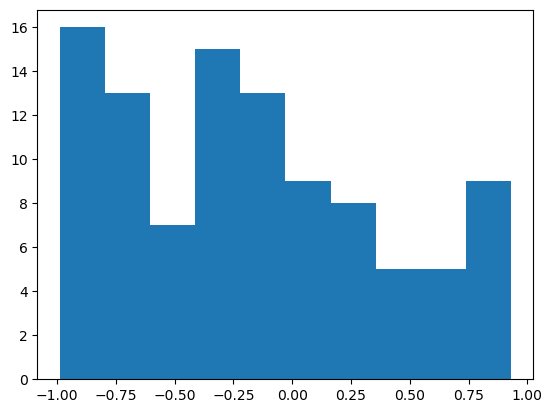

In [4]:
x = x[:100]+10

# getting an overview of the data by drawing a histogramm
plt.hist(x)

### a.) Estimate for $\hat{a}$ and its uncertainty

We will begin by writing a python function for the probability density function $f(x;a)$ and also a function which calculates the log-likelihood function $\ln L(x;a)$.
$$ \ln L(x;a) = \ln\left( \prod_{i=1}^n f(x_i; a) \right) = \sum_{i=1}^n \ln f(x_i; a)$$
$$ = -n\ln(2) + \sum_{i=1}^n \ln(1+ax_i) $$
Since the numerical tool Minuit, which we are using can only minimize, we must use the negative log-likelyhood function in order to fint the maximum likelihood.

In [5]:
def neg_log_L(a):
    return len(x)*np.log(2) - np.sum(np.log(1+a*x))

In [6]:
neg_log_L.errordef=Minuit.LIKELIHOOD
a_hat = Minuit(neg_log_L, a=0.2)
a_hat.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 64.8                       │              Nfcn = 20               │
│ EDM = 1.28e-10 (Goal: 0.0001)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   -0.50   │   0.15    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬────────┐
│   │      a │
├───┼────────┤
│ a │ 0.0236 │
└───┴────────┘

### b.) Plotting the histogram and fitted probability density function

Text(0, 0.5, 'probability density')

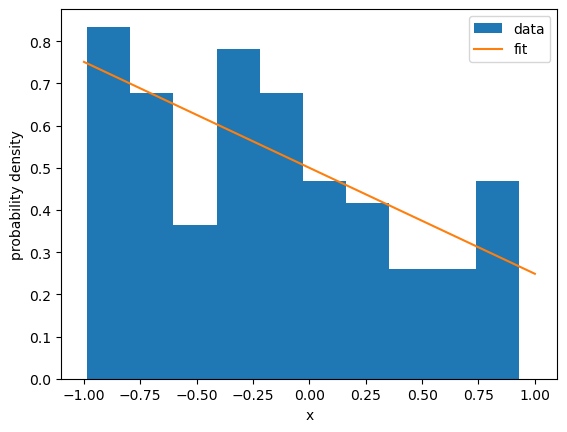

In [7]:
a_est= a_hat.values[0]
a_err = a_hat.errors[0]
x_cont = np.linspace(-1, 1, 200)

plt.hist(x, density=True, label='data')
plt.plot(x_cont, (1+a_est*x_cont)/2, label='fit')
plt.legend()
plt.xlabel('x')
plt.ylabel('probability density')

### c.) Alternative method for determining the uncertainty of the estimate
By finding the values at which the logarithmic likelihood $\ln L$ takes the value of $\ln L_{max}-\frac{1}{2}$, we can determine an upwards and downwards uncertainty $\sigma_+$, $\sigma_-$ for the estimate $\hat a$.

Text(0, 0.5, 'log-likelihood ln L(a)')

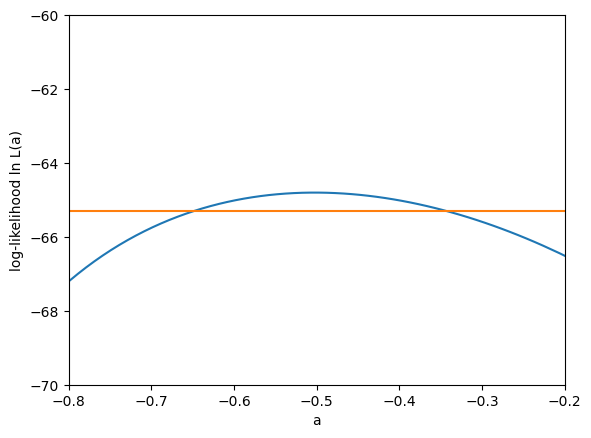

In [15]:
log_L_max = -neg_log_L(a_est)
a_cont = np.linspace(-1, 1, 200)
log_L_cont = []
for a in a_cont:
    log_L_cont.append(-neg_log_L(a))
    
plt.plot(a_cont, log_L_cont)
plt.plot(a_cont, 0*a_cont + log_L_max - 0.5)
plt.xlim(-0.8, -0.2)
plt.ylim(-70, -60)
plt.xlabel('a')
plt.ylabel('log-likelihood ln L(a)')


Now that we have a good idea of the intervals, in which the intersections lie, we can use scipy.optimize's brentq function to determine the zeros of the function
$$ \ln L(a) - \ln L_{max} + \frac{1}{2} $$

In [21]:
from scipy.optimize import brentq

def func(a):
    return -neg_log_L(a) - log_L_max + 0.5

sigma_plus = brentq(func, a_est-0.5, a_est) - a_est
sigma_minus = a_est - brentq(func, a_est, a_est+0.5) 

display(Latex('${} ={}$'.format(r'''\sigma_a^+''',np.round(sigma_plus,3))))
display(Latex('${} ={}$'.format(r'''\sigma_a^-''',np.round(sigma_minus,3))))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [22]:
a_hat.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 64.8                       │              Nfcn = 24               │
│ EDM = 1.28e-10 (Goal: 0.0001)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   -0.50   │   0.15    │   -0.15    │    0.16    │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┐
│          │           a           │
├──────────┼───────────┬───────────┤
│  Error   │   -0.15   │   0.16    │
│  Valid   │   True    │   True    │
│ At Limit │   False   │   False   │
│ Max FCN  │   False   │   False   │
│ New Min  │   False   │   False   │
└──────────┴───────────┴───────────┘
┌───┬────────┐
│   │      a │
├───┼────────┤
│ a │ 0.0236 │
└───┴────────┘

The errors calculated by Minuit's .minos routine are in compliance with the errors which we calculated using brentq.

Finally, we will determine for different sample sizes $n$, how much the upwards and downwards errors vary from one another.

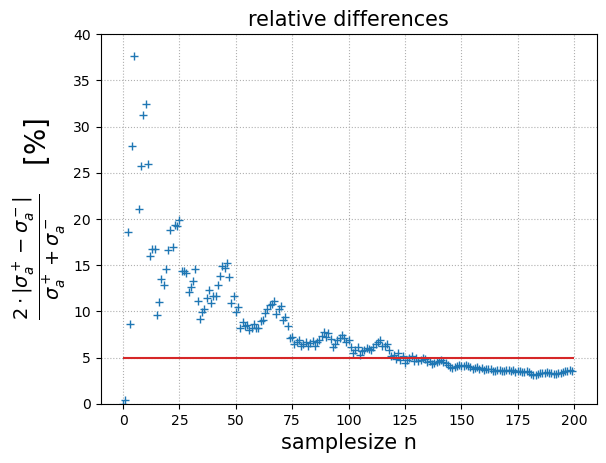

In [39]:
x = np.loadtxt("ml_fit_data4.csv")[:200]+10

relative_diff = np.zeros(200)

for i in range(len(x)):
    x_red = x[:200-i]
    
    def neg_log_likeli(a):
        return len(x_red)*np.log(2) -np.sum(np.log(1 +a*x_red))
    
    
    neg_log_likeli.errordef = Minuit.LIKELIHOOD
    a_hat_ML =  Minuit(neg_log_likeli, a=0.5)
    a_hat_ML.migrad()
    a_hat_ML.minos()
    
    sig_minus = a_hat_ML.merrors[0].lower #we are only interested in the abs. value 
    sig_plus  = a_hat_ML.merrors[0].upper
    
    relative_diff[199-i] = np.abs(2*np.abs(np.abs(sig_minus)-np.abs(sig_plus))/(np.abs(np.abs(sig_minus)
                                                                                      +np.abs(sig_plus)))) 
    
    
plt.plot(range(len(relative_diff)), relative_diff*100, linestyle='', marker='+')
plt.hlines(5, 0,200, color='tab:red')
plt.grid(linestyle=':')
plt.ylim(0, 40)

plt.xlabel('samplesize n', fontsize=15)
plt.ylabel(r'$\frac{2\cdot |\sigma_a^+ -\sigma_a^-|}{\sigma_a^+ +\sigma_a^-}\quad[\%]$', fontsize=20)
plt.title('relative differences', fontsize=15)
plt.show()

As can be seen in the plot above, the relative differences between $\sigma_+$ and $\sigma_-$ are continuously below 5% starting at a sample size of around 120.